## Building a Baseline Regression Model

***

## Attribute Information:

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## Summary

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn

import shap
import statsmodels.api as sm

import datetime
from datetime import datetime, timedelta

import scipy.stats

from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, LogisticRegression, Ridge



%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score


import warnings
warnings.filterwarnings('ignore')


#from pycaret.classification import *
from pycaret.regression import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)


random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Exploratory Data Analysis

In [2]:
df = pd.read_csv("seoulbikesharingclean.csv",parse_dates=['date'])

In [3]:
df

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003.00,19,4.20,34,2.60,1894,-10.30,0.00,0.00,0.00,0,0,0,1,1
8756,2018-11-30,764.00,20,3.40,37,2.30,2000,-9.90,0.00,0.00,0.00,0,0,0,1,1
8757,2018-11-30,694.00,21,2.60,39,0.30,1968,-9.90,0.00,0.00,0.00,0,0,0,1,1
8758,2018-11-30,712.00,22,2.10,41,1.00,1859,-9.80,0.00,0.00,0.00,0,0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            8760 non-null   datetime64[ns]
 1   bikecounts      8760 non-null   float64       
 2   hour            8760 non-null   int64         
 3   temp            8760 non-null   float64       
 4   humidity        8760 non-null   int64         
 5   windspeed       8760 non-null   float64       
 6   visibility      8760 non-null   int64         
 7   dewpointtemp    8760 non-null   float64       
 8   solarradiation  8760 non-null   float64       
 9   rainfall        8760 non-null   float64       
 10  snowfall        8760 non-null   float64       
 11  spring          8760 non-null   int64         
 12  summer          8760 non-null   int64         
 13  winter          8760 non-null   int64         
 14  noholiday       8760 non-null   int64         
 15  func

In [5]:
df.describe(include='all')

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
count,8760,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
unique,365,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2018-05-21 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,24,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,2017-01-12 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2018-12-11 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,722.85,11.50,12.87,58.23,1.72,1436.83,4.07,0.57,0.15,0.08,0.25,0.25,0.25,0.95,0.97
std,NaN,632.34,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44,0.43,0.43,0.43,0.22,0.18
min,NaN,2.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,NaN,221.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00


In [6]:
df.shape

(8760, 16)

In [7]:
df.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'spring', 'summer', 'winter', 'noholiday', 'functioningday'], dtype='object')

## Data Visualization

### Univariate Data Exploration

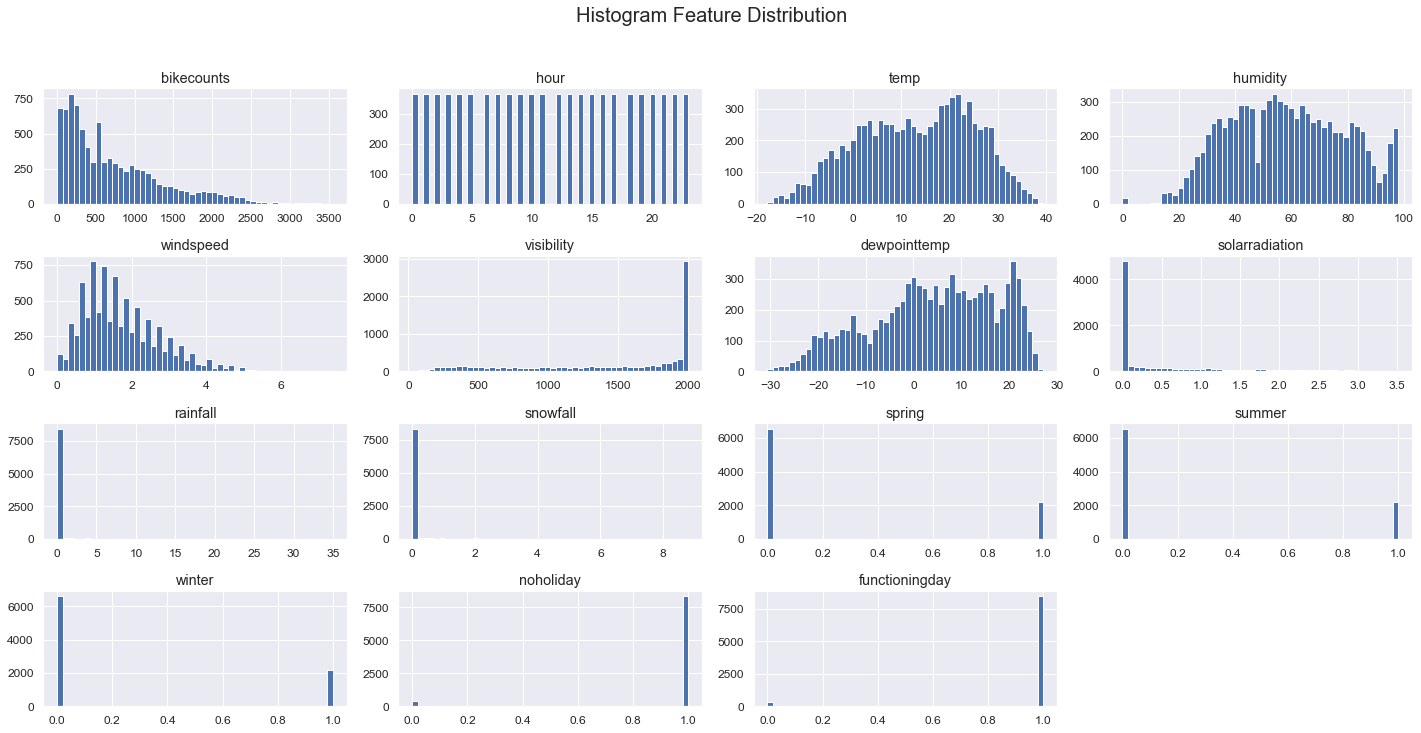

In [8]:
df.hist(bins=50, figsize=(20,10))
plt.suptitle('Histogram Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

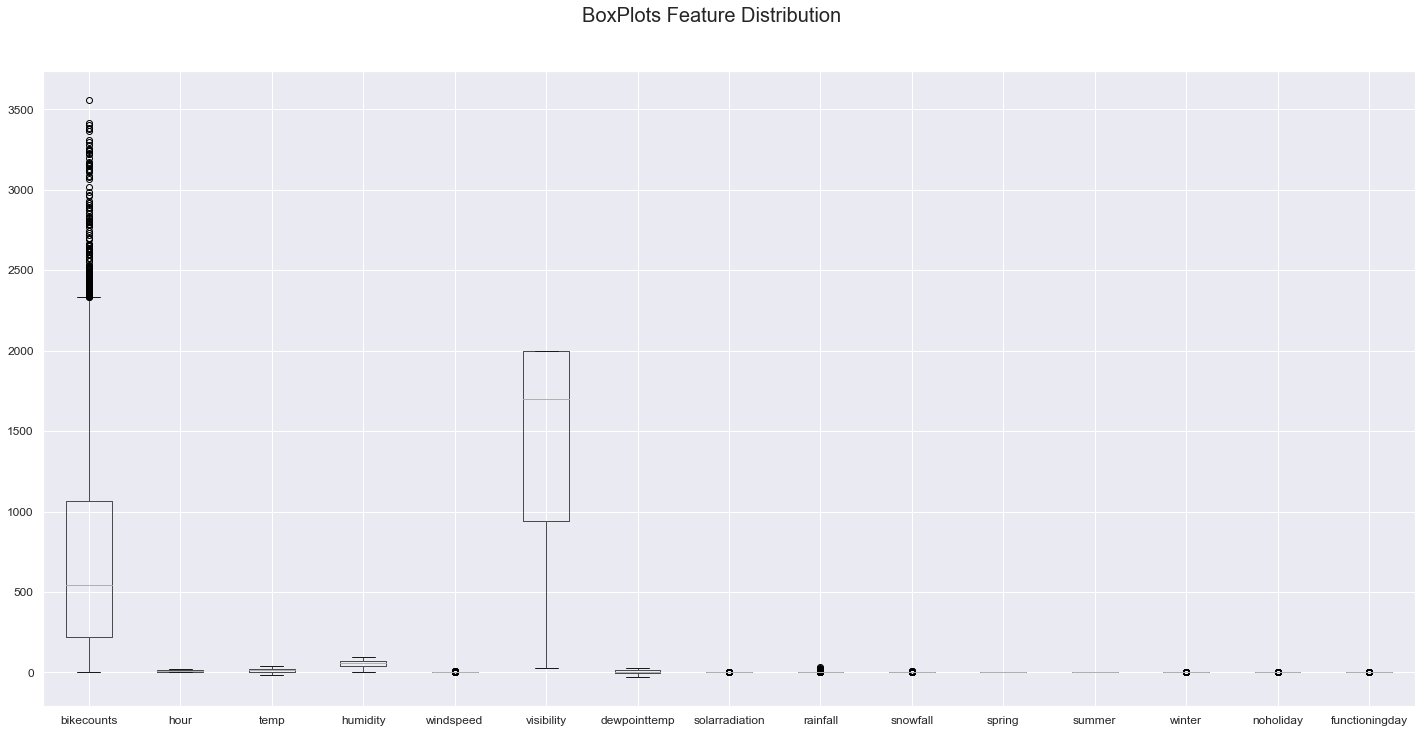

In [9]:
df.boxplot(figsize=(20,10))
plt.suptitle('BoxPlots Feature Distribution', x=0.5, y=1.02, ha='center', fontsize=20)
plt.tight_layout()
plt.show()

### Correlation

In [10]:
df.corr()

,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
bikecounts,1.00,0.42,0.56,-0.20,0.12,0.21,0.40,0.27,-0.13,-0.15,0.02,0.29,-0.45,0.07,0.05
hour,0.42,1.00,0.12,-0.24,0.29,0.10,0.00,0.15,0.01,-0.02,0.00,0.00,-0.00,0.00,0.01
temp,0.56,0.12,1.00,0.16,-0.04,0.04,0.91,0.35,0.05,-0.22,0.01,0.66,-0.74,0.06,-0.05
humidity,-0.20,-0.24,0.16,1.00,-0.34,-0.54,0.54,-0.46,0.24,0.11,0.02,0.19,-0.24,0.05,-0.02
windspeed,0.12,0.29,-0.04,-0.34,1.00,0.17,-0.18,0.33,-0.02,-0.00,0.08,-0.06,0.11,-0.02,0.01
visibility,0.21,0.10,0.04,-0.54,0.17,1.00,-0.18,0.15,-0.17,-0.12,-0.19,0.06,0.01,-0.03,-0.03
dewpointtemp,0.40,0.00,0.91,0.54,-0.18,-0.18,1.00,0.09,0.13,-0.15,0.00,0.65,-0.72,0.07,-0.05
solarradiation,0.27,0.15,0.35,-0.46,0.33,0.15,0.09,1.00,-0.07,-0.07,0.08,0.13,-0.18,0.01,-0.01
rainfall,-0.13,0.01,0.05,0.24,-0.02,-0.17,0.13,-0.07,1.00,0.01,0.02,0.05,-0.06,0.01,0.00
snowfall,-0.15,-0.02,-0.22,0.11,-0.00,-0.12,-0.15,-0.07,0.01,1.00,-0.10,-0.10,0.23,0.01,0.03


In [11]:
df.corr()["bikecounts"].sort_values()

winter           -0.45
humidity         -0.20
snowfall         -0.15
rainfall         -0.13
spring            0.02
functioningday    0.05
noholiday         0.07
windspeed         0.12
visibility        0.21
solarradiation    0.27
summer            0.29
dewpointtemp      0.40
hour              0.42
temp              0.56
bikecounts        1.00
Name: bikecounts, dtype: float64

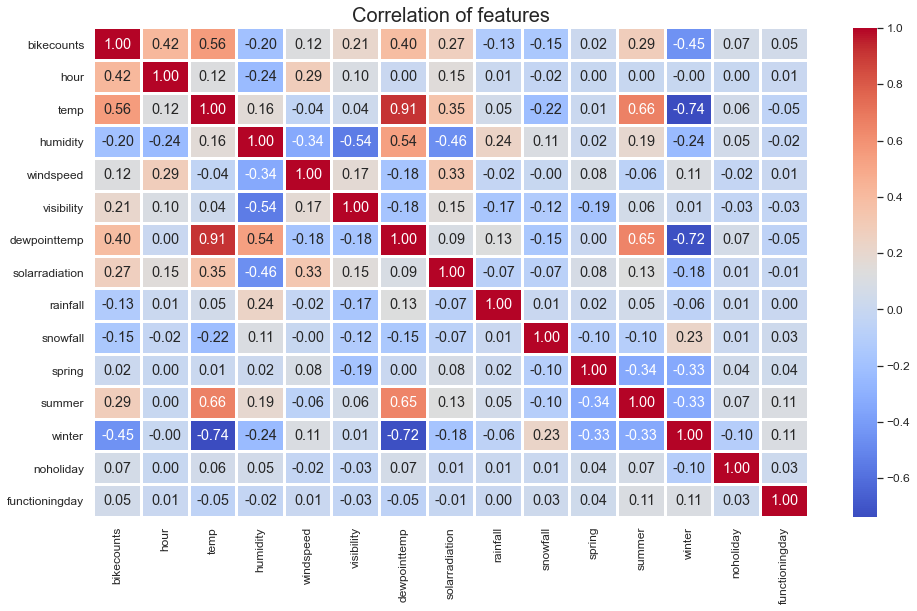

In [12]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.title("Correlation of features", fontsize=20)
plt.show()

## Built a baseline regression model with only weather-related variables

In [13]:
df.columns

Index(['date', 'bikecounts', 'hour', 'temp', 'humidity', 'windspeed', 'visibility', 'dewpointtemp', 'solarradiation', 'rainfall', 'snowfall', 'spring', 'summer', 'winter', 'noholiday', 'functioningday'], dtype='object')

In [14]:
df2 = df[['humidity', 'windspeed','rainfall', 'snowfall','bikecounts']]

In [15]:
df2

,humidity,windspeed,rainfall,snowfall,bikecounts
0,37,2.20,0.00,0.00,254.00
1,38,0.80,0.00,0.00,204.00
2,39,1.00,0.00,0.00,173.00
3,40,0.90,0.00,0.00,107.00
4,36,2.30,0.00,0.00,78.00
...,...,...,...,...,...
8755,34,2.60,0.00,0.00,1003.00
8756,37,2.30,0.00,0.00,764.00
8757,39,0.30,0.00,0.00,694.00
8758,41,1.00,0.00,0.00,712.00


### Train Test Split

In [16]:
X = df2.iloc[:,0:4]
y = df2.iloc[:,4]

In [17]:
X.values, y.values

(array([[37. ,  2.2,  0. ,  0. ],
        [38. ,  0.8,  0. ,  0. ],
        [39. ,  1. ,  0. ,  0. ],
        ...,
        [39. ,  0.3,  0. ,  0. ],
        [41. ,  1. ,  0. ,  0. ],
        [43. ,  1.3,  0. ,  0. ]]),
 array([254., 204., 173., ..., 694., 712., 584.]))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7008, 4), (1752, 4), (7008,), (1752,))

### Feature Scaling

In [20]:
X_train

,humidity,windspeed,rainfall,snowfall
2031,62,0.60,0.00,0.00
6570,57,2.40,0.00,0.00
6371,57,1.70,0.10,0.00
3490,29,0.60,0.00,0.00
7700,47,1.10,0.00,0.00
...,...,...,...,...
4373,75,1.00,0.00,0.00
7891,47,1.00,0.00,0.00
4859,57,1.80,0.00,0.00
3264,59,2.10,0.00,0.00


In [21]:
scaler = StandardScaler()

In [22]:
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
X_test_scaled = scaler.transform(X_test)

In [24]:
X_train_scaled

array([[ 0.18996015, -1.08168277, -0.12713515, -0.17269367],
       [-0.05608294,  0.64784699, -0.12713515, -0.17269367],
       [-0.05608294, -0.02474792, -0.0399397 , -0.17269367],
       ...,
       [-0.05608294,  0.07133707, -0.12713515, -0.17269367],
       [ 0.0423343 ,  0.35959203, -0.12713515, -0.17269367],
       [ 1.22334111,  1.51261186, -0.12713515, -0.17269367]])

In [25]:
X_test_scaled

array([[ 0.73125494, -0.40908786, -0.12713515, -0.17269367],
       [ 0.97729803, -0.69734282, -0.12713515, -0.17269367],
       [ 0.337586  ,  2.47346173, -0.12713515,  0.73708812],
       ...,
       [ 1.37096697, -0.40908786, -0.12713515, -0.17269367],
       [ 0.337586  , -0.02474792, -0.12713515, -0.17269367],
       [ 0.43600324, -0.21691789, -0.12713515, -0.17269367]])

### Model Training

### Using PyCaret

In [26]:
exp_reg = setup(data = df2, target = 'bikecounts', session_id=0, normalize=True, train_size=0.8) 

,Description,Value
0,session_id,0
1,Target,bikecounts
2,Original Data,"(8760, 5)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7008, 4)"


In [27]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,481.2174,372627.2312,610.1531,0.0669,1.1668,2.6679,1.1800
lasso,Lasso Regression,481.2641,372623.6812,610.1497,0.0669,1.1671,2.6715,0.0100
ridge,Ridge Regression,481.2179,372627.0812,610.1530,0.0669,1.1668,2.6680,0.0100
lar,Least Angle Regression,481.2174,372627.2354,610.1531,0.0669,1.1668,2.6679,0.0140
en,Elastic Net,484.0339,374540.3812,611.7024,0.0622,1.1760,2.7903,0.0120
llar,Lasso Least Angle Regression,496.4199,387550.5400,622.2393,0.0296,1.2120,3.1092,0.0120


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [28]:
lrmodel = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,474.9708,364409.4688,603.6634,0.0660,1.1188,2.4802
1,462.4036,343470.6875,586.0637,0.0571,1.1152,2.5156
2,490.5998,377365.7188,614.3010,0.0725,1.2154,2.8083
3,499.4173,408917.9062,639.4669,0.0548,1.1469,2.5553
4,453.7230,325491.9375,570.5190,0.0794,1.1770,2.6480
5,467.8124,350819.3438,592.3000,0.0597,1.1439,2.4237
6,515.8149,423377.7188,650.6748,0.0639,1.2442,3.0294
7,481.3391,363439.8750,602.8597,0.0687,1.1915,2.7705
8,475.7778,375930.2500,613.1315,0.0696,1.1744,3.0572
9,491.1929,393830.3125,627.5590,0.0666,1.1405,2.4090


In [29]:
print(lrmodel)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


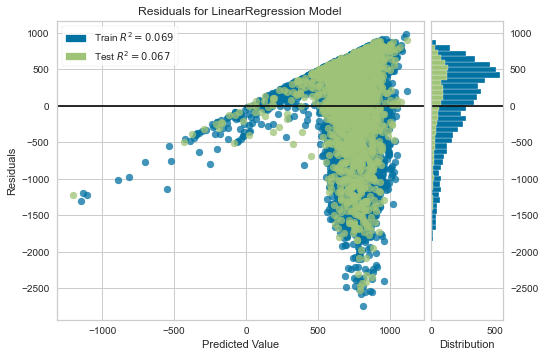

In [30]:
plot_model(lrmodel)

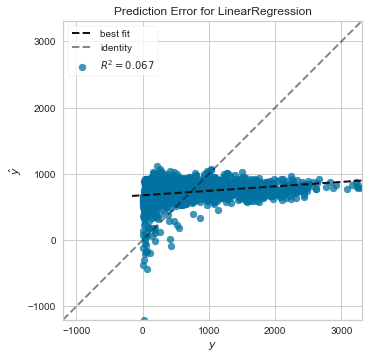

In [31]:
plot_model(lrmodel, plot = 'error')

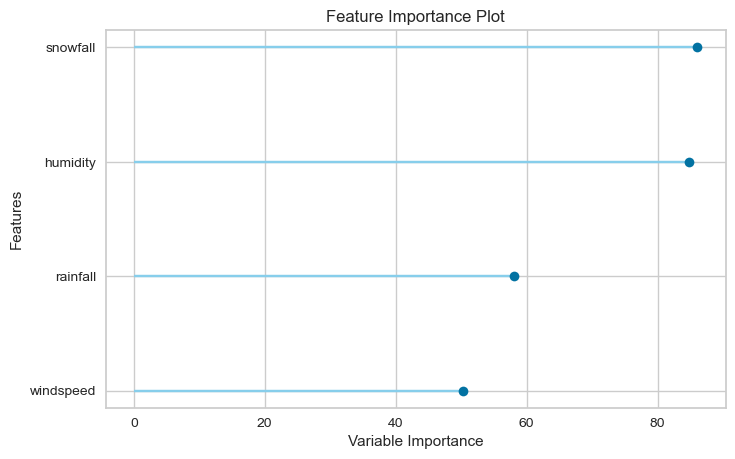

In [32]:
plot_model(lrmodel, plot='feature')

## Built a baseline regression model with all variables

In [33]:
df.head()

,date,bikecounts,hour,temp,humidity,windspeed,visibility,dewpointtemp,solarradiation,rainfall,snowfall,spring,summer,winter,noholiday,functioningday
0,2017-01-12,254.00,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
1,2017-01-12,204.00,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
2,2017-01-12,173.00,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,0,0,1,1,1
3,2017-01-12,107.00,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,0,0,1,1,1
4,2017-01-12,78.00,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,0,0,1,1,1


In [34]:
exp_reg2 = setup(data = df, target = 'bikecounts', session_id=0, normalize=True, train_size=0.8) 

,Description,Value
0,session_id,0
1,Target,bikecounts
2,Original Data,"(8760, 16)"
3,Missing Values,False
4,Numeric Features,9
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(7008, 35)"


In [35]:
compare_models(exclude=['omp','br','ard','par','ransac','tr','huber','kr','svm','knn','dt','rf',
                        'et','ada','gbr','mlp','xgboost','lightgbm','catboost'],fold=5) # For Regressor

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,318.1805,181197.3375,425.5358,0.5459,0.9239,1.6047,0.0160
lr,Linear Regression,318.2041,181221.4219,425.5637,0.5458,0.9238,1.6052,0.0160
lar,Least Angle Regression,318.2041,181221.4015,425.5636,0.5458,0.9238,1.6052,0.0160
lasso,Lasso Regression,317.8843,181373.6938,425.7420,0.5454,0.9183,1.5921,0.0300
en,Elastic Net,336.0380,210365.8844,458.4085,0.4733,0.9121,1.6724,0.0160
llar,Lasso Least Angle Regression,342.0470,218483.1313,467.1895,0.4529,0.9478,2.0163,0.0160


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

In [36]:
lrmodel2 = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,317.1563,180032.8750,424.3028,0.5386,0.9043,1.3594
1,307.2601,163261.6094,404.0565,0.5518,0.8835,1.3457
2,318.2002,180363.7344,424.6925,0.5567,0.9860,1.7550
3,318.9995,189241.0000,435.0184,0.5626,0.9107,1.5847
4,311.6680,167021.3125,408.6824,0.5276,0.8937,1.5680
5,305.2763,171933.0625,414.6481,0.5392,0.9245,1.6530
6,328.0816,197317.3594,444.2042,0.5637,0.9522,1.7299
7,330.1945,193396.0469,439.7682,0.5044,0.9320,1.8311
8,320.6869,186026.3594,431.3077,0.5396,0.9060,1.5617
9,323.8840,182132.9375,426.7704,0.5683,0.9208,1.6885


In [37]:
print(lrmodel2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


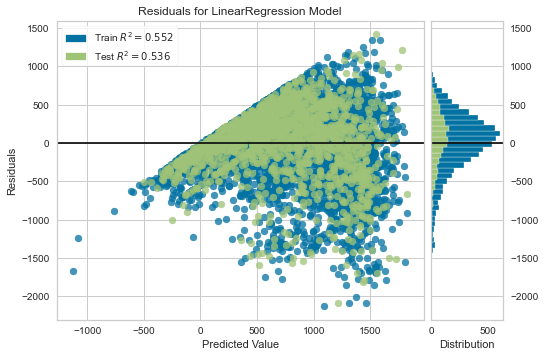

In [38]:
plot_model(lrmodel2)

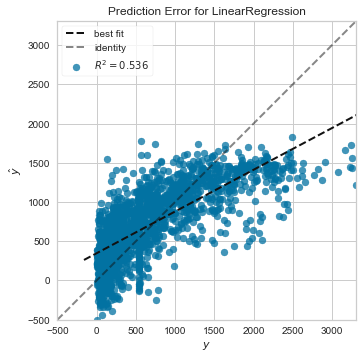

In [39]:
plot_model(lrmodel2, plot = 'error')

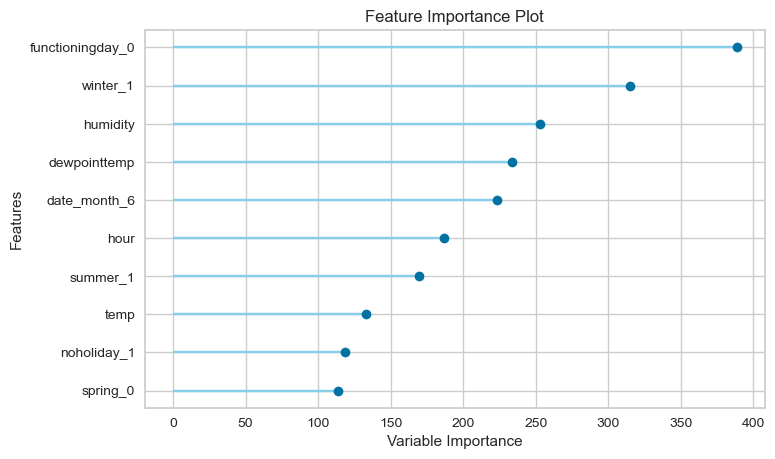

In [40]:
plot_model(lrmodel2, plot='feature')

#### Python code done by Dennis Lam